In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Fast PM Plots

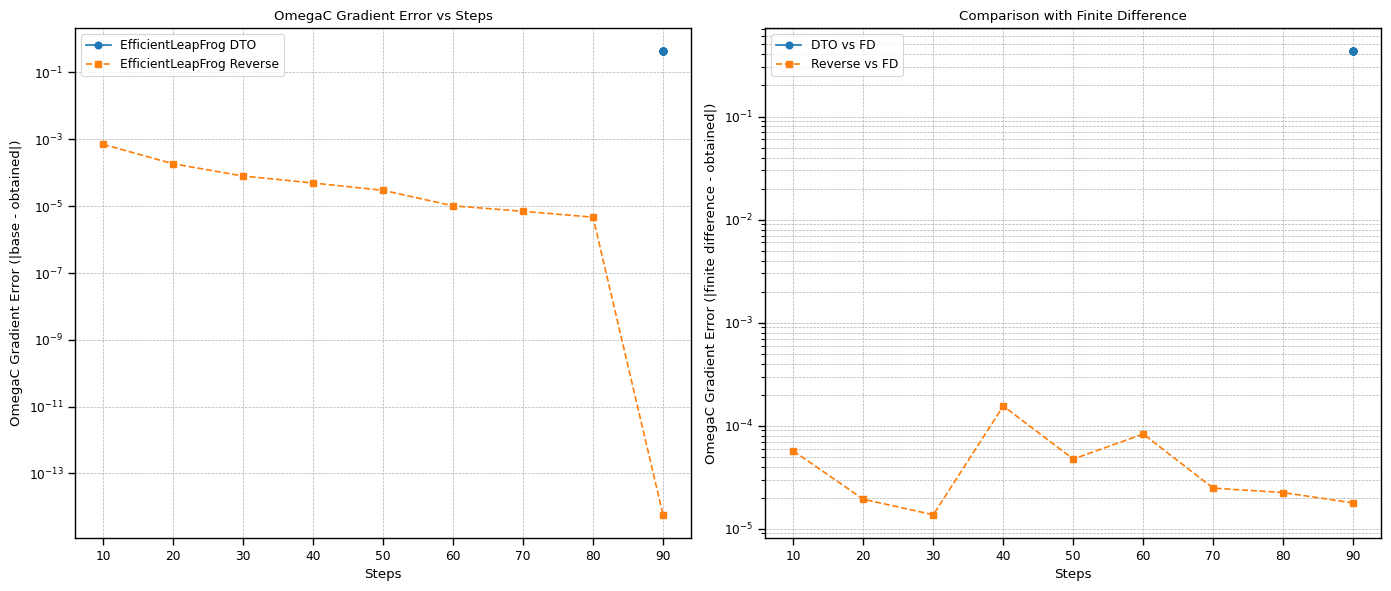

In [2]:
data = np.load("data/GS_FPM_OmegaC_gradient_error.npz")

base_fpm_grad = data["base_fpm_grad"]
fpm_steps_DTO = data["fpm_steps_DTO"]
fpm_steps_REV = data["fpm_steps_REV"]
fpm_grads_DTO = data["fpm_grads_DTO"]
fpm_grads_REV = data["fpm_grads_REV"]
fpm_grads_fd = data["fpm_grads_fd"]
fpm_error_DTO = data["fpm_error_DTO"] 

sns.set_context("paper")

# Compute absolute errors
fpm_error_DTO = [abs(base_fpm_grad - grad) for grad in fpm_grads_DTO]
fpm_error_REV = [abs(base_fpm_grad - grad) for grad in fpm_grads_REV]

# Compute errors relative to finite differences
fpm_error_FD_DTO = [
    abs(fd_grad - dto_grad) for fd_grad, dto_grad in zip(fpm_grads_fd, fpm_grads_DTO)
]
fpm_error_FD_REV = [
    abs(fd_grad - otd_grad) for fd_grad, otd_grad in zip(fpm_grads_fd, fpm_grads_REV)
]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Gradient Error vs Steps in Subplot 1
ax1.plot(
    fpm_steps_DTO,
    fpm_error_DTO,
    marker="o",
    linestyle="-",
    label="EfficientLeapFrog DTO",
)
ax1.plot(
    fpm_steps_REV,
    fpm_error_REV,
    marker="s",
    linestyle="--",
    label="EfficientLeapFrog Reverse",
)

# Customize Subplot 1
ax1.set_yscale("log")  # Log scale for gradient errors
ax1.set_xlabel("Steps")
ax1.set_ylabel("OmegaC Gradient Error (|base - obtained|)")
ax1.set_title("OmegaC Gradient Error vs Steps")
ax1.legend()
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Plot Finite Difference Comparison in Subplot 2
ax2.plot(fpm_steps_DTO, fpm_error_FD_DTO, marker="o", linestyle="-", label="DTO vs FD")
ax2.plot(
    fpm_steps_REV, fpm_error_FD_REV, marker="s", linestyle="--", label="Reverse vs FD"
)

# Customize Subplot 2
ax2.set_yscale("log")  # Log scale for gradient errors
ax2.set_xlabel("Steps")
ax2.set_ylabel("OmegaC Gradient Error (|finite difference - obtained|)")
ax2.set_title("Comparison with Finite Difference")
ax2.legend()
ax2.grid(True, which="both", linestyle="--", linewidth=0.5)

# Adjust layout and save
plt.tight_layout()
plt.savefig("plots/GS_FPM_OmegaC_gradient_error.pdf", dpi=600, transparent=True)
plt.show()

In [ ]:
data = np.load("data/GS_FPM_initial_field_gradient_error.npz")


base_fpm_grad = data["base_fpm_grad"]
fpm_grads_DTO = data["fpm_grads_DTO"]
fpm_grads_REV = data["fpm_grads_REV"]
fpm_grads_fd = data["fpm_grads_fd"]
fpm_steps_DTO = data["fpm_steps_DTO"]
fpm_steps_REV = data["fpm_steps_REV"]


sns.set_context("paper")

# Compute absolute errors
fpm_error_DTO = [abs(base_fpm_grad - grad) for grad in fpm_grads_DTO]
fpm_error_REV = [abs(base_fpm_grad - grad) for grad in fpm_grads_REV]

# Compute errors relative to finite differences
fpm_error_FD_DTO = [
    abs(fd_grad - dto_grad) for fd_grad, dto_grad in zip(fpm_grads_fd, fpm_grads_DTO)
]
fpm_error_FD_REV = [
    abs(fd_grad - otd_grad) for fd_grad, otd_grad in zip(fpm_grads_fd, fpm_grads_REV)
]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Gradient Error vs Steps in Subplot 1
ax1.plot(
    fpm_steps_DTO,
    fpm_error_DTO,
    marker="o",
    linestyle="-",
    label="EfficientLeapFrog DTO",
)
ax1.plot(
    fpm_steps_REV,
    fpm_error_REV,
    marker="s",
    linestyle="--",
    label="EfficientLeapFrog Reverse",
)

# Customize Subplot 1
ax1.set_xlabel("Steps")
ax1.set_ylabel("Initial Field Gradient Error Gradient Error (|base - obtained|)")
ax1.set_title("Initial Field Gradient Error Gradient Error vs Steps")
ax1.legend()
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Plot Finite Difference Comparison in Subplot 2
ax2.plot(fpm_steps_DTO, fpm_error_FD_DTO, marker="o", linestyle="-", label="DTO vs FD")
ax2.plot(
    fpm_steps_REV, fpm_error_FD_REV, marker="s", linestyle="--", label="Reverse vs FD"
)

# Customize Subplot 2
# ax2.set_yscale("log")  # Log scale for gradient errors
# ax2.set_ylim(1e-8, 1e-3)
ax2.set_xlabel("Steps")
ax2.set_ylabel("Initial Field Gradient Error (|finite difference - obtained|)")
ax2.set_title("Comparison with Finite Difference")
ax2.legend()
ax2.grid(True, which="both", linestyle="--", linewidth=0.5)

# Adjust layout and save
plt.tight_layout()
plt.savefig("plots/GS_FPM_initial_field_gradient_error.pdf", dpi=600, transparent=True)
plt.show()

In [ ]:
data = np.load("data/GS_FPM_memory_usage_and_error.npz")

checkpoints = data["checkpoints"]
fpm_grad_base_REV_err = data["fpm_grad_base_REV_err"]
fpm_error_DTO = data["fpm_error_DTO"]
fpm_steps_base_DTO = data["fpm_steps_base_DTO"]
fpm_memories_DTO = data["fpm_memories_DTO"]
fpm_memories_base_REV = data["fpm_memories_base_REV"]

# Data Preparation
checkpoints = fpm_checkpoints_DTO

# Error baselines
fpm_grad_base_REV_err = abs(
    fpm_grad_base_DTO - fpm_grad_base_REV
)  # Baseline absolute error for OTD

# Errors for DTO and OTD
fpm_error_DTO = [abs(fpm_grad_base_DTO - grad) for grad in fpm_grads_DTO]
mean_err = sum(fpm_error_DTO) / len(fpm_error_DTO)
fpm_error_DTO = [mean_err if err == 0 else err for err in fpm_error_DTO]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define colors
error_color = "tab:blue"
memory_color = "tab:orange"

# Primary Y-axis: Absolute Error
ax1.set_xlabel("Checkpoints")
ax1.set_ylabel("Absolute Error (log scale)", color=error_color)

ax1.axhline(
    fpm_grad_base_REV_err,
    color=error_color,
    linestyle="-.",
    label=f"Reverse Baseline steps {fpm_steps_base_DTO}",
)
# Plot errors
ax1.plot(
    checkpoints,
    fpm_error_DTO,
    marker="o",
    color=error_color,
    label=f"FPM Error (DTO) steps {fpm_steps_base_DTO}",
)


# Add horizontal line for baseline errors
ax1.tick_params(axis="y", labelcolor=error_color)

ax1.legend(loc="upper left")
ax1.set_yscale("log")
# Secondary Y-axis: Memory Usage
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.set_ylabel("Memory Usage (bytes)", color=memory_color)

# Plot memory usage
ax2.plot(
    checkpoints,
    fpm_memories_DTO,
    marker="o",
    linestyle="-",
    color=memory_color,
    label="Memory (DTO)",
)

# Add horizontal line for memory baselines
ax2.axhline(
    fpm_memories_base_REV, color=memory_color, linestyle=":", label="Memory (Reverse)"
)

ax2.tick_params(axis="y", labelcolor=memory_color)
ax2.legend(loc="upper right")

# Title and grid
plt.title("Memory Usage and Absolute Error vs Checkpoints")
plt.grid(which="both", linestyle="--", linewidth=0.5)  # Add x-y grid
plt.minorticks_on()  # Enable minor ticks for finer grid
plt.grid(which="minor", linestyle=":", linewidth=0.5)  # Minor grid lines

# Show or Save
plt.tight_layout()
plt.savefig("plots/GS_memory_usage_and_error.pdf", dpi=600, transparent=True)
plt.show()

# Adaptive steps

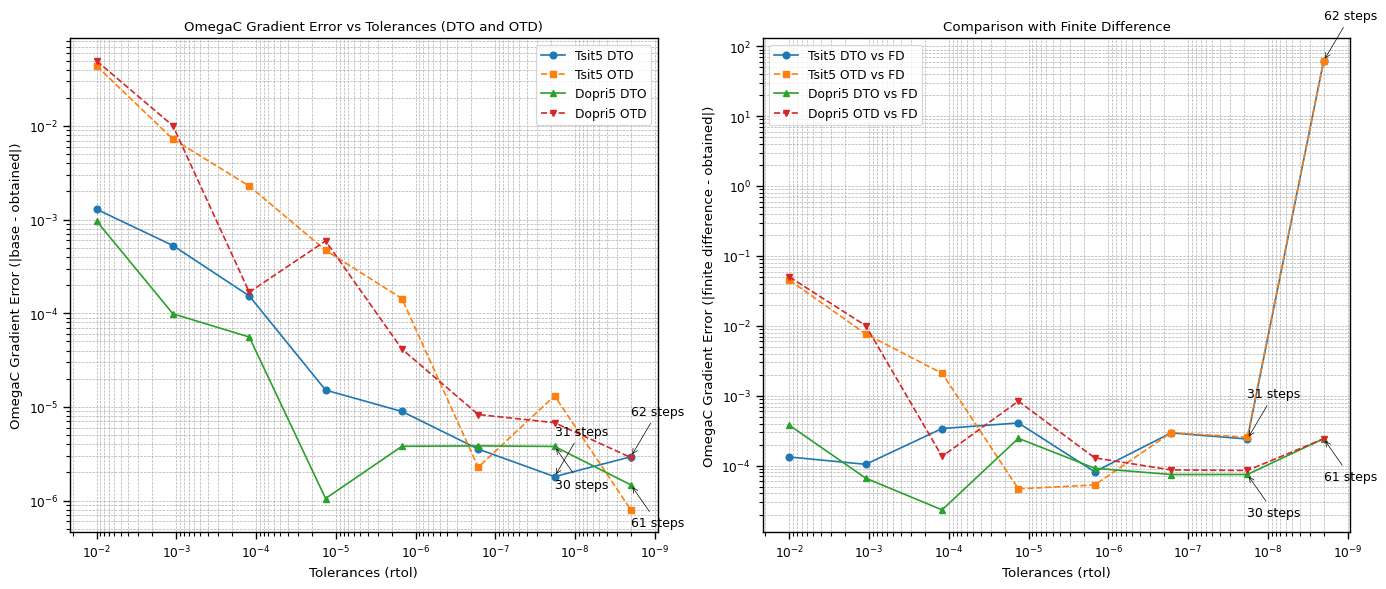

In [4]:
data = np.load("data/GS_AS_OmegaC_gradient_error.npz")


base_tsit_grad = data["base_tsit_grad"]
base_dopri_grad = data["base_dopri_grad"]
tsit_grads_DTO = data["tsit_grads_DTO"]
tsit_grads_OTD = data["tsit_grads_OTD"]
dopri_grads_DTO = data["dopri_grads_DTO"]
dopri_grads_OTD = data["dopri_grads_OTD"]
tsit_steps_DTO = data["tsit_steps_DTO"]
tsit_steps_OTD = data["tsit_steps_OTD"]
dopri_steps_DTO = data["dopri_steps_DTO"]
dopri_steps_OTD = data["dopri_steps_OTD"]
tsit_grads_fd = data["tsit_grads_fd"]
dopri_grads_fd = data["dopri_grads_fd"]
tols = data["tols"]
sns.set_context("paper")

# Compute absolute errors
tsit_error_DTO = [abs(base_tsit_grad - grad) for grad in tsit_grads_DTO]
tsit_error_OTD = [abs(base_tsit_grad - grad) for grad in tsit_grads_OTD]
dopri_error_DTO = [abs(base_dopri_grad - grad) for grad in dopri_grads_DTO]
dopri_error_OTD = [abs(base_dopri_grad - grad) for grad in dopri_grads_OTD]

# Compute errors relative to finite differences
tsit_error_FD_DTO = [
    abs(fd_grad - dto_grad) for fd_grad, dto_grad in zip(tsit_grads_fd, tsit_grads_DTO)
]
tsit_error_FD_OTD = [
    abs(fd_grad - otd_grad) for fd_grad, otd_grad in zip(tsit_grads_fd, tsit_grads_OTD)
]
dopri_error_FD_DTO = [
    abs(fd_grad - dto_grad)
    for fd_grad, dto_grad in zip(dopri_grads_fd, dopri_grads_DTO)
]
dopri_error_FD_OTD = [
    abs(fd_grad - otd_grad)
    for fd_grad, otd_grad in zip(dopri_grads_fd, dopri_grads_OTD)
]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Gradient Error vs Tolerance (DTO and OTD) in Subplot 1
ax1.plot(tols, tsit_error_DTO, marker="o", linestyle="-", label="Tsit5 DTO")
ax1.plot(tols, tsit_error_OTD, marker="s", linestyle="--", label="Tsit5 OTD")
ax1.plot(tols, dopri_error_DTO, marker="^", linestyle="-", label="Dopri5 DTO")
ax1.plot(tols, dopri_error_OTD, marker="v", linestyle="--", label="Dopri5 OTD")

# Annotate the last two points for each solver/mode
for solver, errors, steps, marker, offset in [
    ("Tsit5 DTO", tsit_error_DTO, tsit_steps_DTO, "o", (0, 30)),
    ("Dopri5 DTO", dopri_error_DTO, dopri_steps_DTO, "^", (0, -30)),
]:
    for i in range(-2, 0):  # Annotate the last two points
        ax1.annotate(
            f"{steps[i]} steps",
            (tols[i], errors[i]),
            textcoords="offset points",
            xytext=(offset[0], offset[1]),  # Adjust offsets to avoid overlap
            fontsize=9,
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5),
        )

# Customize Subplot 1
ax1.set_xscale("log")  # Log scale for tolerances
ax1.set_yscale("log")  # Log scale for gradient errors
ax1.invert_xaxis()  # Reverse the X-axis
ax1.set_xlabel("Tolerances (rtol)")
ax1.set_ylabel("OmegaC Gradient Error (|base - obtained|)")
ax1.set_title("OmegaC Gradient Error vs Tolerances (DTO and OTD)")
ax1.legend()
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Plot Finite Difference Comparison in Subplot 2
ax2.plot(tols, tsit_error_FD_DTO, marker="o", linestyle="-", label="Tsit5 DTO vs FD")
ax2.plot(tols, tsit_error_FD_OTD, marker="s", linestyle="--", label="Tsit5 OTD vs FD")
ax2.plot(tols, dopri_error_FD_DTO, marker="^", linestyle="-", label="Dopri5 DTO vs FD")
ax2.plot(tols, dopri_error_FD_OTD, marker="v", linestyle="--", label="Dopri5 OTD vs FD")

# Annotate the last two points for each solver/mode in Subplot 2
for solver, errors, steps, marker, offset in [
    ("Tsit5 DTO vs FD", tsit_error_FD_DTO, tsit_steps_DTO, "o", (0, 30)),
    ("Dopri5 DTO vs FD", dopri_error_FD_DTO, dopri_steps_DTO, "^", (0, -30)),
]:
    for i in range(-2, 0):  # Annotate the last two points
        ax2.annotate(
            f"{steps[i]} steps",
            (tols[i], errors[i]),
            textcoords="offset points",
            xytext=(offset[0], offset[1]),  # Adjust offsets to avoid overlap
            fontsize=9,
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5),
        )

# Customize Subplot 2
ax2.set_xscale("log")  # Log scale for tolerances
ax2.set_yscale("log")  # Log scale for gradient errors
ax2.invert_xaxis()  # Reverse the X-axis
ax2.set_xlabel("Tolerances (rtol)")
ax2.set_ylabel("OmegaC Gradient Error (|finite difference - obtained|)")
ax2.set_title("Comparison with Finite Difference")
ax2.legend()
ax2.grid(True, which="both", linestyle="--", linewidth=0.5)

# Adjust layout and save
plt.tight_layout()
plt.savefig("plots/GS_AS_OmegaC_gradient_error.pdf", dpi=600, transparent=True)
plt.show()


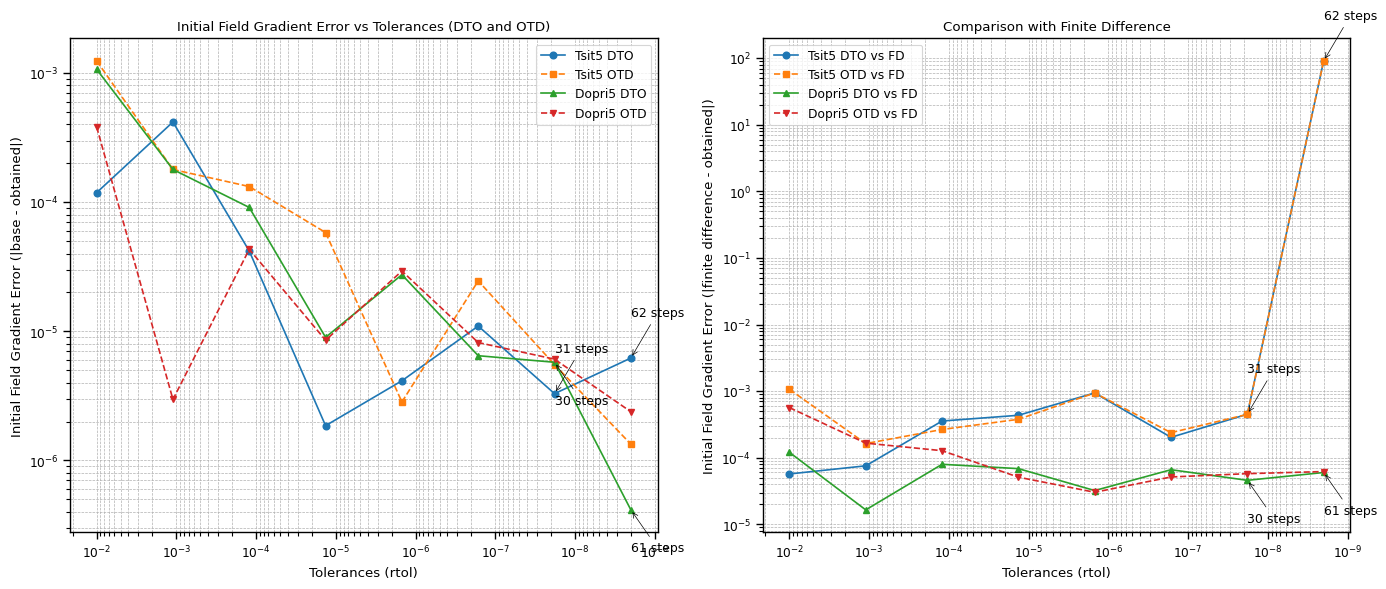

In [5]:
data = np.load("data/GS_AS_initial_field_gradient_error.npz")

base_tsit_grad = data['base_tsit_grad']
tsit_grads_DTO = data['tsit_grads_DTO']
tsit_grads_OTD = data['tsit_grads_OTD']
base_dopri_grad = data['base_dopri_grad']
dopri_grads_DTO = data['dopri_grads_DTO']
dopri_grads_OTD = data['dopri_grads_OTD']
tsit_steps_DTO = data['tsit_steps_DTO']
tsit_steps_OTD = data['tsit_steps_OTD']
dopri_steps_DTO = data['dopri_steps_DTO']
dopri_steps_OTD = data['dopri_steps_OTD']
tsit_grads_fd = data['tsit_grads_fd']
dopri_grads_fd = data['dopri_grads_fd']
tols = data['tols']

sns.set_context("paper")

# Compute absolute errors
tsit_error_DTO = [abs(base_tsit_grad - grad) for grad in tsit_grads_DTO]
tsit_error_OTD = [abs(base_tsit_grad - grad) for grad in tsit_grads_OTD]
dopri_error_DTO = [abs(base_dopri_grad - grad) for grad in dopri_grads_DTO]
dopri_error_OTD = [abs(base_dopri_grad - grad) for grad in dopri_grads_OTD]

# Compute errors relative to finite differences
tsit_error_FD_DTO = [
    abs(fd_grad - dto_grad) for fd_grad, dto_grad in zip(tsit_grads_fd, tsit_grads_DTO)
]
tsit_error_FD_OTD = [
    abs(fd_grad - otd_grad) for fd_grad, otd_grad in zip(tsit_grads_fd, tsit_grads_OTD)
]
dopri_error_FD_DTO = [
    abs(fd_grad - dto_grad)
    for fd_grad, dto_grad in zip(dopri_grads_fd, dopri_grads_DTO)
]
dopri_error_FD_OTD = [
    abs(fd_grad - otd_grad)
    for fd_grad, otd_grad in zip(dopri_grads_fd, dopri_grads_OTD)
]

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot Gradient Error vs Tolerance (DTO and OTD) in Subplot 1
ax1.plot(tols, tsit_error_DTO, marker="o", linestyle="-", label="Tsit5 DTO")
ax1.plot(tols, tsit_error_OTD, marker="s", linestyle="--", label="Tsit5 OTD")
ax1.plot(tols, dopri_error_DTO, marker="^", linestyle="-", label="Dopri5 DTO")
ax1.plot(tols, dopri_error_OTD, marker="v", linestyle="--", label="Dopri5 OTD")

# Annotate the last two points for each solver/mode
for solver, errors, steps, marker, offset in [
    ("Tsit5 DTO", tsit_error_DTO, tsit_steps_DTO, "o", (0, 30)),
    ("Dopri5 DTO", dopri_error_DTO, dopri_steps_DTO, "^", (0, -30)),
]:
    for i in range(-2, 0):  # Annotate the last two points
        ax1.annotate(
            f"{steps[i]} steps",
            (tols[i], errors[i]),
            textcoords="offset points",
            xytext=(offset[0], offset[1]),  # Adjust offsets to avoid overlap
            fontsize=9,
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5),
        )

# Customize Subplot 1
ax1.set_xscale("log")  # Log scale for tolerances
ax1.set_yscale("log")  # Log scale for gradient errors
ax1.invert_xaxis()  # Reverse the X-axis
ax1.set_xlabel("Tolerances (rtol)")
ax1.set_ylabel("Initial Field Gradient Error (|base - obtained|)")
ax1.set_title("Initial Field Gradient Error vs Tolerances (DTO and OTD)")
ax1.legend()
ax1.grid(True, which="both", linestyle="--", linewidth=0.5)

# Plot Finite Difference Comparison in Subplot 2
ax2.plot(tols, tsit_error_FD_DTO, marker="o", linestyle="-", label="Tsit5 DTO vs FD")
ax2.plot(tols, tsit_error_FD_OTD, marker="s", linestyle="--", label="Tsit5 OTD vs FD")
ax2.plot(tols, dopri_error_FD_DTO, marker="^", linestyle="-", label="Dopri5 DTO vs FD")
ax2.plot(tols, dopri_error_FD_OTD, marker="v", linestyle="--", label="Dopri5 OTD vs FD")

# Annotate the last two points for each solver/mode in Subplot 2
for solver, errors, steps, marker, offset in [
    ("Tsit5 DTO vs FD", tsit_error_FD_DTO, tsit_steps_DTO, "o", (0, 30)),
    ("Dopri5 DTO vs FD", dopri_error_FD_DTO, dopri_steps_DTO, "^", (0, -30)),
]:
    for i in range(-2, 0):  # Annotate the last two points
        ax2.annotate(
            f"{steps[i]} steps",
            (tols[i], errors[i]),
            textcoords="offset points",
            xytext=(offset[0], offset[1]),  # Adjust offsets to avoid overlap
            fontsize=9,
            arrowprops=dict(arrowstyle="->", color="black", lw=0.5),
        )

# Customize Subplot 2
ax2.set_xscale("log")  # Log scale for tolerances
ax2.set_yscale("log")  # Log scale for gradient errors
ax2.invert_xaxis()  # Reverse the X-axis
ax2.set_xlabel("Tolerances (rtol)")
ax2.set_ylabel("Initial Field Gradient Error (|finite difference - obtained|)")
ax2.set_title("Comparison with Finite Difference")
ax2.legend()
ax2.grid(True, which="both", linestyle="--", linewidth=0.5)

# Adjust layout and save
plt.tight_layout()
plt.savefig("plots/GS_AS_initial_field_gradient_error.pdf", dpi=600, transparent=True)
plt.show()

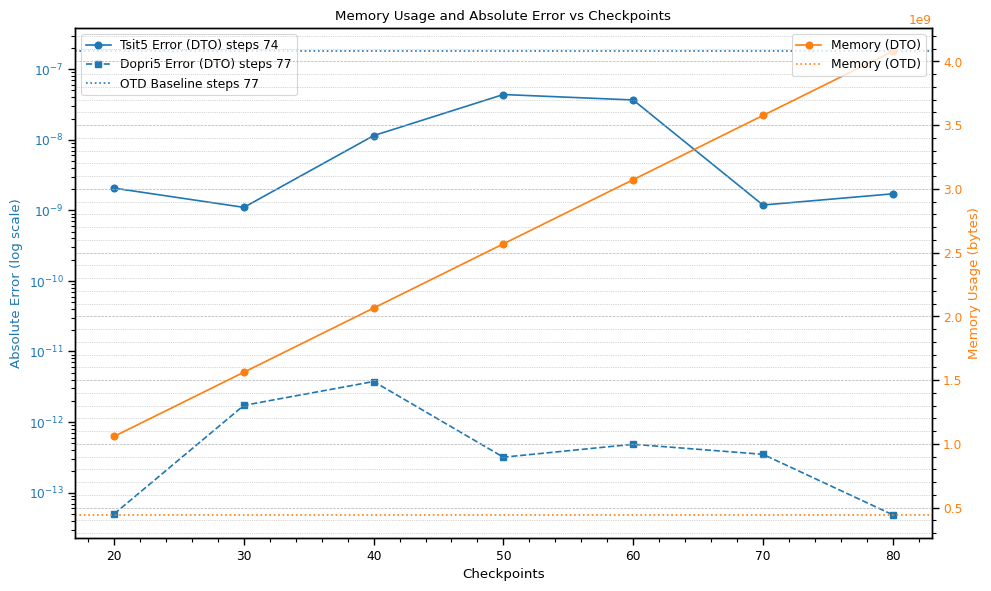

In [6]:
data = np.load("data/GS_AS_memory_usage_and_error.npz")


dopri_checkpoints_DTO = data["dopri_checkpoints_DTO"]
tsit_grad_base_OTD = data["tsit_grad_base_OTD"]
tsit_grad_base_DTO = data["tsit_grad_base_DTO"]
dopri_grad_base_OTD = data["dopri_grad_base_OTD"]
dopri_grad_base_DTO = data["dopri_grad_base_DTO"]
tsit_grads_DTO = data["tsit_grads_DTO"]
dopri_grads_DTO = data["dopri_grads_DTO"]
tsit_steps_base_DTO = data["tsit_steps_base_DTO"]
dopri_steps_base_DTO = data["dopri_steps_base_DTO"]
tsit_steps_base_OTD = data["tsit_steps_base_OTD"]
dopri_steps_base_OTD = data["dopri_steps_base_OTD"]
tsit_memories_DTO = data["tsit_memories_DTO"]
tsit_memory_base_OTD = data["tsit_memory_base_OTD"]
# Data Preparation
checkpoints = dopri_checkpoints_DTO

# Error baselines
tsit_grad_base_OTD_err = abs(
    tsit_grad_base_DTO - tsit_grad_base_OTD
)  # Baseline absolute error for OTD
dopri_grad_base_OTD_err = abs(
    dopri_grad_base_DTO - dopri_grad_base_OTD
)  # Baseline absolute error for OTD

# Errors for DTO and OTD
tsit_error_DTO = [abs(tsit_grad_base_DTO - grad) for grad in tsit_grads_DTO]
dopri_error_DTO = [abs(dopri_grad_base_DTO - grad) for grad in dopri_grads_DTO]

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Define colors
error_color = "tab:blue"
memory_color = "tab:orange"

# Primary Y-axis: Absolute Error
ax1.set_xlabel("Checkpoints")
ax1.set_ylabel("Absolute Error (log scale)", color=error_color)

# Plot errors
ax1.plot(
    checkpoints,
    tsit_error_DTO,
    marker="o",
    color=error_color,
    label=f"Tsit5 Error (DTO) steps {tsit_steps_base_DTO}",
)
ax1.plot(
    checkpoints,
    dopri_error_DTO,
    marker="s",
    color=error_color,
    linestyle="--",
    label=f"Dopri5 Error (DTO) steps {dopri_steps_base_DTO}",
)

# Add horizontal line for baseline errors
ax1.axhline(
    tsit_grad_base_OTD_err,
    color=error_color,
    linestyle=":",
    label=f"OTD Baseline steps {dopri_steps_base_OTD}",
)

ax1.tick_params(axis="y", labelcolor=error_color)
ax1.set_yscale("log")  # Log scale for absolute error
ax1.legend(loc="upper left")

# Secondary Y-axis: Memory Usage
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.set_ylabel("Memory Usage (bytes)", color=memory_color)

# Plot memory usage
ax2.plot(
    checkpoints,
    tsit_memories_DTO,
    marker="o",
    linestyle="-",
    color=memory_color,
    label="Memory (DTO)",
)

# Add horizontal line for memory baselines
ax2.axhline(
    tsit_memory_base_OTD, color=memory_color, linestyle=":", label="Memory (OTD)"
)

ax2.tick_params(axis="y", labelcolor=memory_color)
ax2.legend(loc="upper right")

# Title and grid
plt.title("Memory Usage and Absolute Error vs Checkpoints")
plt.grid(which="both", linestyle="--", linewidth=0.5)  # Add x-y grid
plt.minorticks_on()  # Enable minor ticks for finer grid
plt.grid(which="minor", linestyle=":", linewidth=0.5)  # Minor grid lines

# Show or Save
plt.tight_layout()
plt.savefig("plots/GS_AS_memory_usage_and_error.pdf", dpi=600, transparent=True)
plt.show()
